<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#include all datascience libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
titanic=pd.read_csv("Titanic_data_set.csv")

In [0]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
titanic.shape
print("the total rows are {} and columns are {}".format(titanic.shape[0],titanic.shape[1]))

the total rows are 891 and columns are 12


In [0]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
[print(column,np.unique(titanic[column].isnull())) for column in titanic.columns]

PassengerId [False]
Survived [False]
Pclass [False]
Name [False]
Sex [False]
Age [False  True]
SibSp [False]
Parch [False]
Ticket [False]
Fare [False]
Cabin [False  True]
Embarked [False  True]


[None, None, None, None, None, None, None, None, None, None, None, None]

In [0]:
list((column,np.unique(titanic[column].astype(str)).size) for column in titanic.columns)

[('PassengerId', 891),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 891),
 ('Sex', 2),
 ('Age', 89),
 ('SibSp', 7),
 ('Parch', 7),
 ('Ticket', 681),
 ('Fare', 248),
 ('Cabin', 148),
 ('Embarked', 4)]

In [0]:
print("total_females=",len(titanic[(titanic["Sex"]=="female")].index))
print("total_males=",len(titanic[(titanic["Sex"]=="male")].index))

total_females= 314
total_males= 577


In [0]:
survived=titanic[(titanic["Sex"]=="male" )&(titanic["Survived"]==1)]

In [0]:
len(survived.index)

109

In [0]:
survived=titanic[(titanic["Sex"]=="female" )&(titanic["Survived"]==1)]

In [0]:
len(survived.index)

233

In [0]:
print([titanic.groupby("Sex")["Survived"].value_counts(normalize=True)])

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


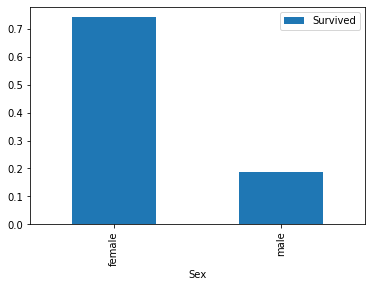

In [0]:
class_privot=titanic.pivot_table(index="Sex",values="Survived")
class_privot.plot.bar()
plt.show()

In [0]:
titanic_pass=titanic["Pclass"].value_counts().sort_index()
titanic_pass

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [0]:
[titanic.groupby("Pclass")["Survived"].sum()]

[Pclass
 1    136
 2     87
 3    119
 Name: Survived, dtype: int64]

In [0]:
[titanic.groupby("Pclass")["Survived"].value_counts(normalize=True)]

[Pclass  Survived
 1       1           0.629630
         0           0.370370
 2       0           0.527174
         1           0.472826
 3       0           0.757637
         1           0.242363
 Name: Survived, dtype: float64]

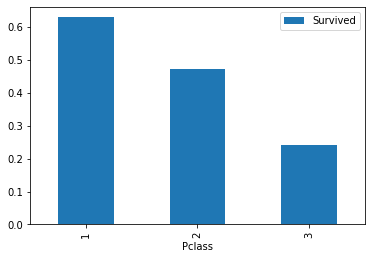

In [0]:
class_pivot=titanic.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

In [0]:
corr=titanic.corr(method="pearson")
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


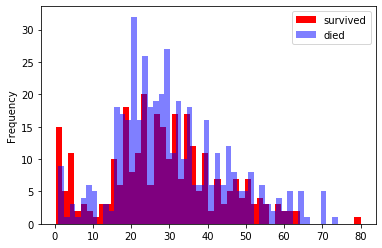

In [0]:
survived=titanic[titanic["Survived"]==1]
died=titanic[titanic["Survived"]==0]
survived["Age"].plot.hist(color="red",bins=50)
died["Age"].plot.hist(alpha=0.5,color="blue",bins=50)
plt.legend(["survived","died"])
plt.show()


In [0]:
titanic_c=titanic

titanic_c["Age"]=titanic_c["Age"].fillna(titanic["Age"].mean(),inplace=False)
titanic_c["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [0]:
titanic_c.isna().all()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

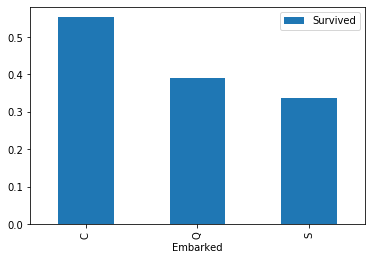

In [0]:
class_pivot=titanic_c.pivot_table(index="Embarked",values="Survived")
class_pivot.plot.bar()
plt.show()

In [0]:
titanic_c.shape

(891, 12)

In [0]:
titanic_c.isna().all()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [0]:
titanic_c=titanic_c.dropna(subset=["Sex","Pclass","Embarked","Age"])

In [0]:
titanic_c.shape

(889, 12)

In [0]:
Y_titanic=titanic_c.loc[:,"Survived"]
X_titanic=titanic_c.loc[:,["Age","Sex","Pclass","Embarked"]]

In [0]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
age=scal.fit_transform(X_titanic["Age"].values.reshape(-1,1))
X_titanic["Age"]=age
X_titanic.head()



,Age,Sex,Pclass,Embarked
0,-0.590495,male,3,S
1,0.643971,female,1,C
2,-0.281878,female,3,S
3,0.412509,female,1,S
4,0.412509,male,3,S


In [0]:
X_titanic_he=pd.get_dummies(X_titanic,columns=["Pclass","Sex","Embarked"])
X_titanic_he.head()


,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.590495,0,0,1,0,1,0,0,1
1,0.643971,1,0,0,1,0,1,0,0
2,-0.281878,0,0,1,1,0,0,0,1
3,0.412509,1,0,0,1,0,0,0,1
4,0.412509,0,0,1,0,1,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_he,Y_titanic,test_size=0.3,random_state=0)

In [0]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(min_samples_split=70,min_samples_leaf=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7790262172284644

In [0]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.8227848101265823

In [0]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.5909090909090909

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6878306878306879